# Helper Graphing Code

In [18]:
import os
import json
import numpy as np

directory = "dataset_results_o3_mini"  #change to model jsonl result path as needed

context_sizes = [500, 1000, 2000, 4000, 8000, 16000] 
depth_percentages = [0, 25, 50, 75, 100]  

grouped_accuracies = {(context, depth): [] for context in context_sizes for depth in depth_percentages}

# parse files
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".jsonl"):
        with open(os.path.join(directory, filename), "r") as file:
            for line in file:
                data = json.loads(line)
                # extract the context size, depth percentage, and accuracy
                context = data.get("context_length")
                depth = data.get("depth_percentage")
                accuracy = data.get("accuracy")
                
                # broup the accuracy by context size and depth percentage
                if context in context_sizes and depth in depth_percentages and accuracy is not None:
                    grouped_accuracies[(context, depth)].append(accuracy)

# calculate averages for each (context size, depth percentage) combination
averaged_accuracies = np.zeros((len(depth_percentages), len(context_sizes))) 

for i, depth in enumerate(depth_percentages):
    for j, context in enumerate(context_sizes):
        accuracies = grouped_accuracies[(context, depth)]
        if accuracies:
            averaged_accuracies[i, j] = sum(accuracies) / len(accuracies)

# print accuracy matrix
print("Averaged Accuracy Array (Depth x Context):")
print(averaged_accuracies)

print("Formatted Array:")
for row in averaged_accuracies:
    print([round(val, 2) for val in row])


Averaged Accuracy Array (Depth x Context):
[[75.     74.1655 68.638  69.0625 65.714  61.3455]
 [80.     73.569  67.9165 67.3545 64.318  59.8155]
 [70.001  71.25   68.078  66.1105 62.1755 58.0365]
 [67.5    68.335  67.857  65.2635 60.6255 56.5525]
 [71.     67.5    68.3335 65.5    60.8    57.834 ]]
Formatted Array:
[75.0, 74.17, 68.64, 69.06, 65.71, 61.35]
[80.0, 73.57, 67.92, 67.35, 64.32, 59.82]
[70.0, 71.25, 68.08, 66.11, 62.18, 58.04]
[67.5, 68.34, 67.86, 65.26, 60.63, 56.55]
[71.0, 67.5, 68.33, 65.5, 60.8, 57.83]


In [20]:
## formatted array results

# gpt_4o_result = []

# gpt_o1_result = [] ### done already January - results sent to Andy

deepseek_chat_result = [[70.0, 40.83, 39.54, 40.94, 40.48, 41.15],
                        [42.5, 37.86, 37.5, 39.12, 39.54, 40.37],
                        [31.66, 35.62, 36.54, 38.06, 39.35, 40.0],
                        [30.0, 33.89, 37.14, 38.16, 38.33, 39.48],
                        [37.0, 35.5, 39.33, 39.75, 39.4, 40.67]]

deepseek_r1_result = [[100.0, 96.67, 91.82, 83.12, 72.86, 65.77],
                      [100.0, 95.71, 90.0, 80.3, 70.68, 63.89],
                      [98.33, 93.12, 86.54, 76.94, 68.48, 61.96],
                      [96.25, 91.67, 83.57, 73.42, 65.83, 60.17],
                      [96.0, 91.0, 82.33, 71.75, 64.4, 59.5]]

o3_mini_result = [[75.0, 74.17, 68.64, 69.06, 65.71, 61.35],
                  [80.0, 73.57, 67.92, 67.35, 64.32, 59.82],
                  [70.0, 71.25, 68.08, 66.11, 62.18, 58.04],
                  [67.5, 68.34, 67.86, 65.26, 60.63, 56.55],
                  [71.0, 67.5, 68.33, 65.5, 60.8, 57.83]]


In [21]:
all_results = [deepseek_chat_result, deepseek_r1_result, o3_mini_result]
model_names = ["Deepseek Chat", "Deepseek R1", "o3 Mini"]

In [22]:
import statistics

context_sizes = ['500', '1k', '2k', '4k', '8k', '16k']

total = 0
result_num = 0

for i, result in enumerate(all_results):
    print(f"{model_names[i]} Results:")
    avg_results = []
    for j in range(len(result[0])):
        total += result[0][j] + result[1][j] + result[2][j] + result[3][j] + result[4][j]
        result_num += 5
        avg_per_ctx_len = (result[0][j] + result[1][j] + result[2][j] + result[3][j] + result[4][j]) / 5
        avg_results.append(avg_per_ctx_len)
        print(f"Context Length {context_sizes[j]}: {avg_per_ctx_len:.0f}")
    # Calculate and print the standard deviation for the current model
    std_dev = statistics.pstdev(avg_results)
    print(f"Standard Deviation between context lengths: {std_dev:.1f}")
    print()

print(f"Average Accuracy: {total / result_num:.1f}")

Deepseek Chat Results:
Context Length 500: 42
Context Length 1k: 37
Context Length 2k: 38
Context Length 4k: 39
Context Length 8k: 39
Context Length 16k: 40
Standard Deviation between context lengths: 1.7

Deepseek R1 Results:
Context Length 500: 98
Context Length 1k: 94
Context Length 2k: 87
Context Length 4k: 77
Context Length 8k: 68
Context Length 16k: 62
Standard Deviation between context lengths: 13.0

o3 Mini Results:
Context Length 500: 73
Context Length 1k: 71
Context Length 2k: 68
Context Length 4k: 67
Context Length 8k: 63
Context Length 16k: 59
Standard Deviation between context lengths: 4.8

Average Accuracy: 62.3


/var/folders/h2/gpl39dl10m96lnjkyhggrgmw0000gn/T/ipykernel_71775/4247520642.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)


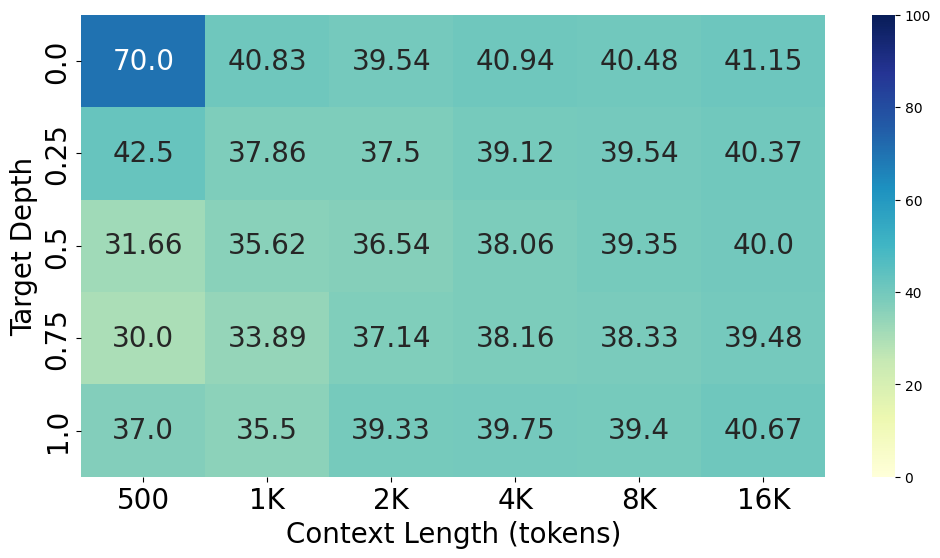

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(deepseek_chat_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

/var/folders/h2/gpl39dl10m96lnjkyhggrgmw0000gn/T/ipykernel_71775/1445234490.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)


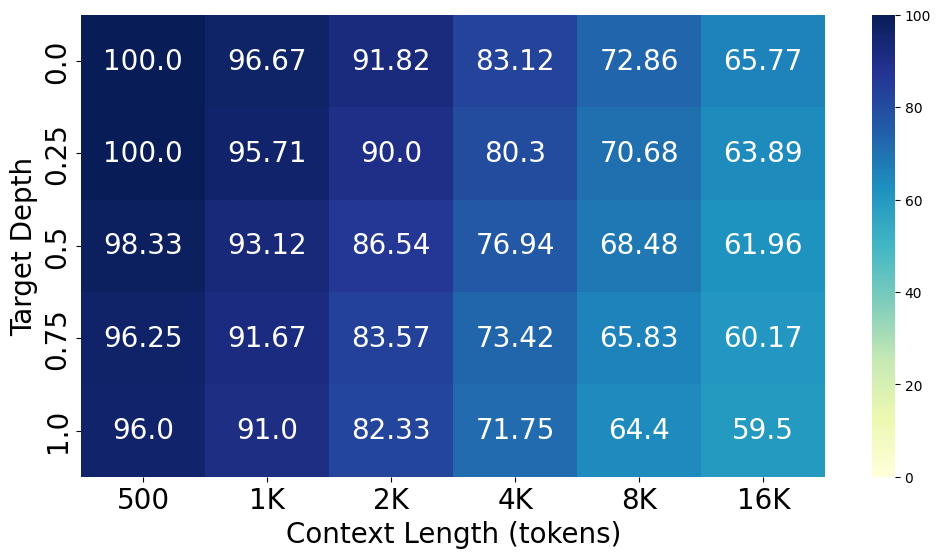

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(deepseek_r1_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

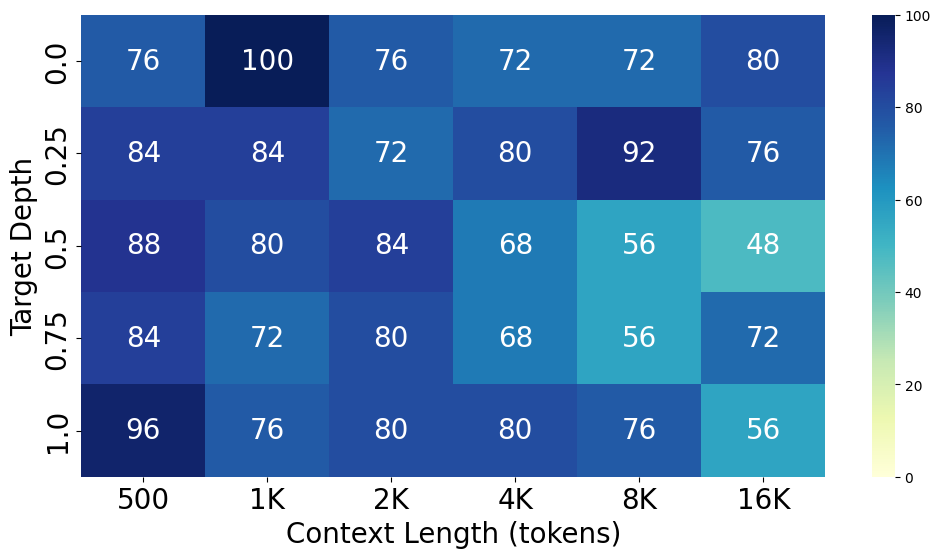

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(o3_mini_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

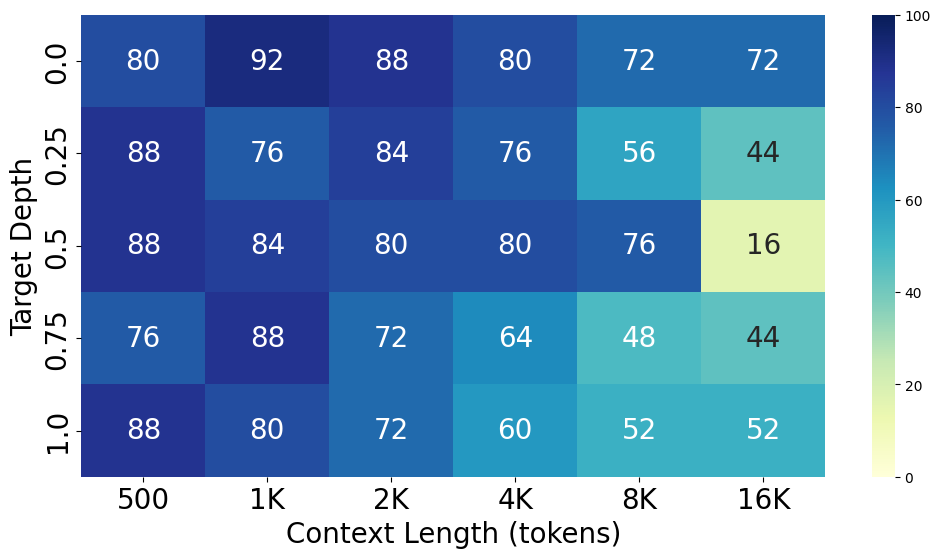

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(deepseek_r1_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()

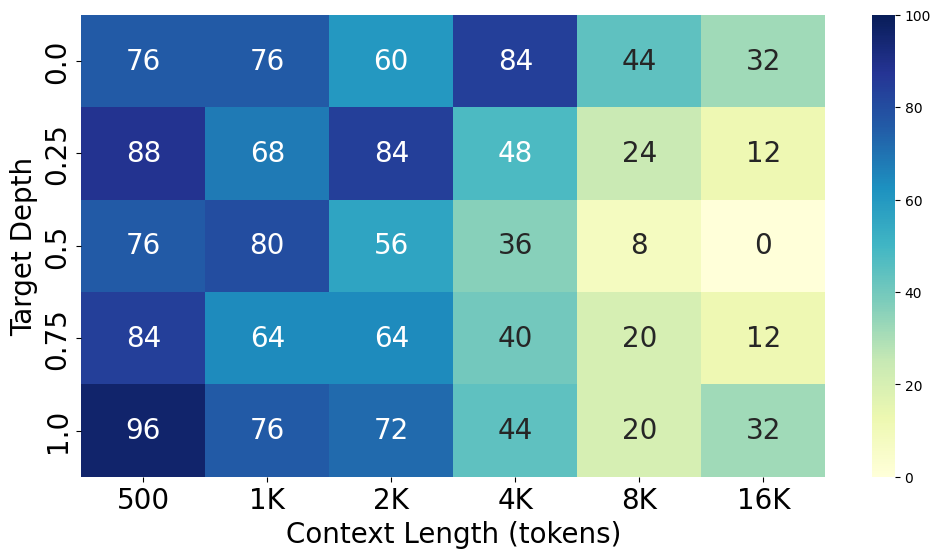

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom labels for the axes
custom_x_labels = ["500", "1K", "2K", "4K", "8K", "16K"]  # x-axis labels
custom_y_labels = ["0.0", "0.25", "0.5", "0.75", "1.0"]  # y-axis labels, modify as needed

# Create a DataFrame from the hard-coded data
df = pd.DataFrame(claude_3_opus_result, index=custom_y_labels, columns=custom_x_labels)

# Replace non-numeric values with NaN for plotting purposes, while retaining original data for annotations
numeric_df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(numeric_df, annot=df.values, fmt="", cmap="YlGnBu", annot_kws={'size': 20}, vmin=0, vmax=100)  # Set the scale from 0 to 100
plt.xlabel('Context Length (tokens)', fontsize=20)
plt.ylabel('Target Depth', fontsize=20)
ax.set_xticklabels(custom_x_labels)  # Set custom labels for the x-axis
ax.set_yticklabels(custom_y_labels)  # Set custom labels for the y-axis
plt.tick_params(labelsize=20)
plt.show()